In [4]:
# Use the file from canvas and perform linear regression, with temperature as a function of years, and plot the results.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import scipy.stats as stats

raw_data = pd.read_csv('global-temperatures.csv')

# The csv file contains some metadata that need to be removed in order to create two columns for year and temperature
raw_data

,# Average global annual temperatures from 1880 to 2017
0,# First column is year and second column is av...
1,# temperature in degrees celsius
2,# Data (temp. anomalies) collected from
3,# https://data.giss.nasa.gov/gistemp/
4,# Anomalies adjusted with
...,...
139,2013 14.8091666666667
140,2014 14.8791666666667
141,2015 14.975
142,2016 15.2416666666667


In [2]:
# Step 1: Read the file, skipping the comment lines:
with open('global-temperatures.csv') as file:
    lines = file.readlines()

# Step 2: Filter out the lines that starts with '#'
data_lines = [line for line in lines if not line.startswith('#')]
# ---> returns an array with just the data
data_lines

['1880 13.5725\n',
 '1881 13.5991666666667\n',
 '1882 13.685\n',
 '1883 13.6716666666667\n',
 '1884 13.395\n',
 '1885 13.535\n',
 '1886 13.3891666666667\n',
 '1887 13.3241666666667\n',
 '1888 13.5375\n',
 '1889 13.8133333333333\n',
 '1890 13.455\n',
 '1891 13.4658333333333\n',
 '1892 13.5175\n',
 '1893 13.5008333333333\n',
 '1894 13.61\n',
 '1895 13.6783333333333\n',
 '1896 13.7133333333333\n',
 '1897 13.8116666666667\n',
 '1898 13.6391666666667\n',
 '1899 13.71\n',
 '1900 13.8558333333333\n',
 '1901 13.8733333333333\n',
 '1902 13.6691666666667\n',
 '1903 13.6091666666667\n',
 '1904 13.4975\n',
 '1905 13.6766666666667\n',
 '1906 13.785\n',
 '1907 13.4858333333333\n',
 '1908 13.63\n',
 '1909 13.6166666666667\n',
 '1910 13.6808333333333\n',
 '1911 13.6516666666667\n',
 '1912 13.6758333333333\n',
 '1913 13.6775\n',
 '1914 13.925\n',
 '1915 13.935\n',
 '1916 13.7091666666667\n',
 '1917 13.495\n',
 '1918 13.59\n',
 '1919 13.8325\n',
 '1920 13.7466666666667\n',
 '1921 13.8575\n',
 '1922 13.7

In [5]:
# Step 3: Split the remaining lines into 'Year' and 'Temperature'
years = []
temperatures = []

for line in data_lines:
    year, temperature = line.split() # Split on whitespace
    years.append(int(year)) # Convert year to integer
    temperatures.append(float(temperature)) # Convert temperature to float


# Step 4: Create a DataFrame
data = pd.DataFrame({
    'Year': years,
    'Temperature' : temperatures
})
data


,Year,Temperature
0,1880,13.572500
1,1881,13.599167
2,1882,13.685000
3,1883,13.671667
4,1884,13.395000
...,...,...
133,2013,14.809167
134,2014,14.879167
135,2015,14.975000
136,2016,15.241667


In [6]:
data.describe()

,Year,Temperature
count,138.000000,138.000000
mean,1948.500000,14.038937
std,39.981246,0.417791
min,1880.000000,13.324167
25%,1914.250000,13.755833
50%,1948.500000,13.932083
75%,1982.750000,14.239375
max,2017.000000,15.241667


In [7]:
# Prepare the data by splitting the data into seperate variables 
X = data[['Year']].values
y = data[['Temperature']].values

In [8]:
# Create a model and train the linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [9]:
# Make predictions
y_pred = model.predict(X)

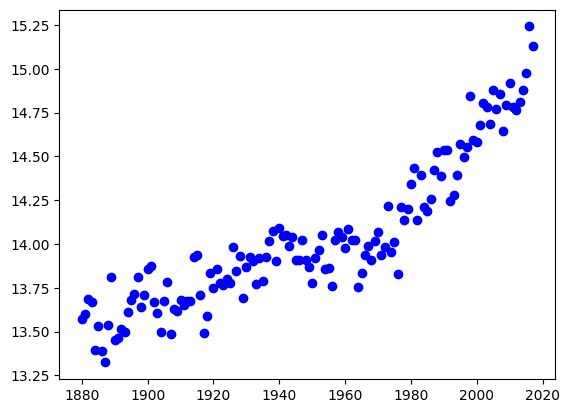

In [10]:
# Plot the actual Data
plt.scatter(X, y, color='blue', label='Actual Data')

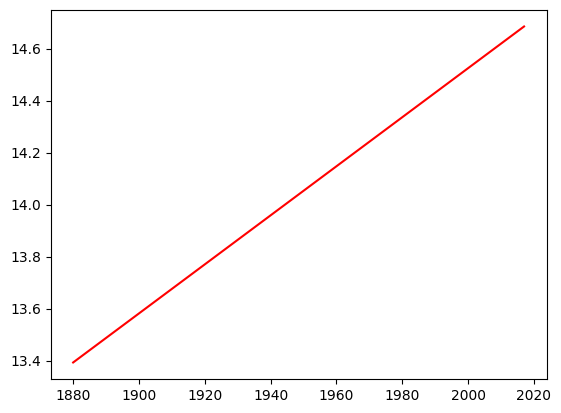

In [25]:
# Drawing the models predicted line
plt.plot(X, y_pred, color='red', label='Regression Line')

Text(0.5, 1.0, 'Temperature Over Years - Linear Regression')

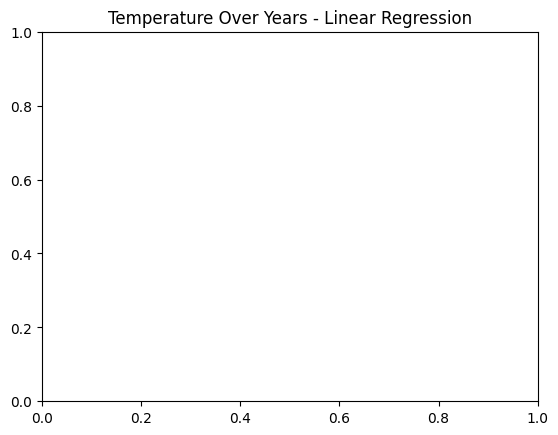

In [11]:
# Adding title
plt.title('Temperature Over Years - Linear Regression')

Text(0, 0.5, 'Temperature')

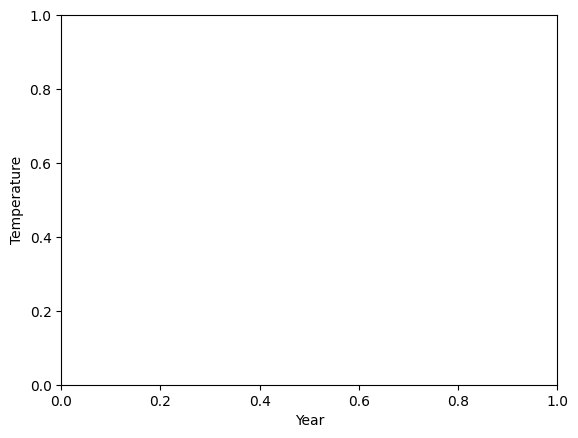

In [27]:
# Adding the lables
plt.xlabel('Year')
plt.ylabel('Temperature')

Text(0, 0.5, 'Temperature')

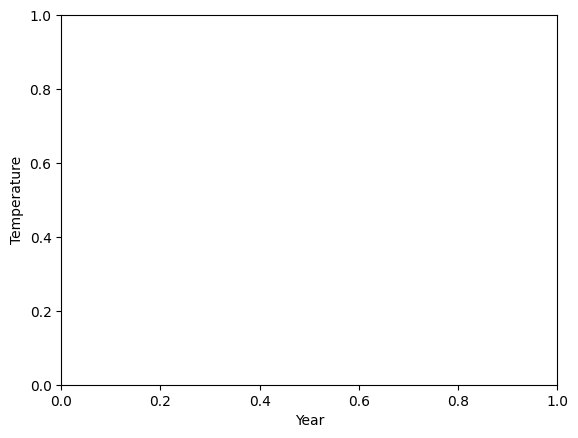

In [12]:
plt.xlabel('Year')
plt.ylabel('Temperature')

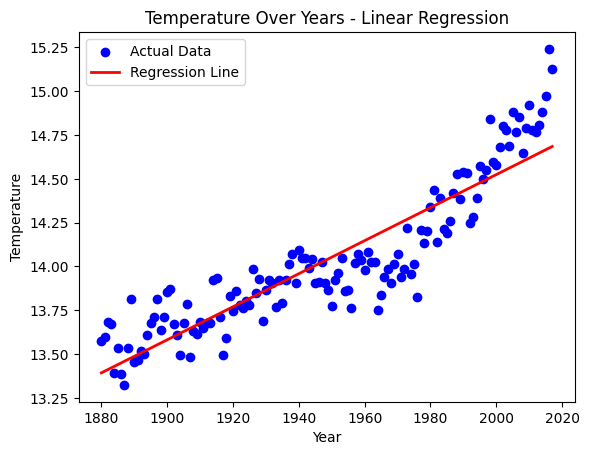

In [29]:
# 2A
# All together to compleate the visualization
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Temperature Over Years - Linear Regression')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [13]:
# 2B
# The R^2 value is telling me how well the linear regression model explains the variation in the 
# dependent variable (temperature) based on the independent variable (years)
r_squared = model.score(X, y)
print(f'R^2 value: {r_squared}')

R^2 value: 0.8145436075330899


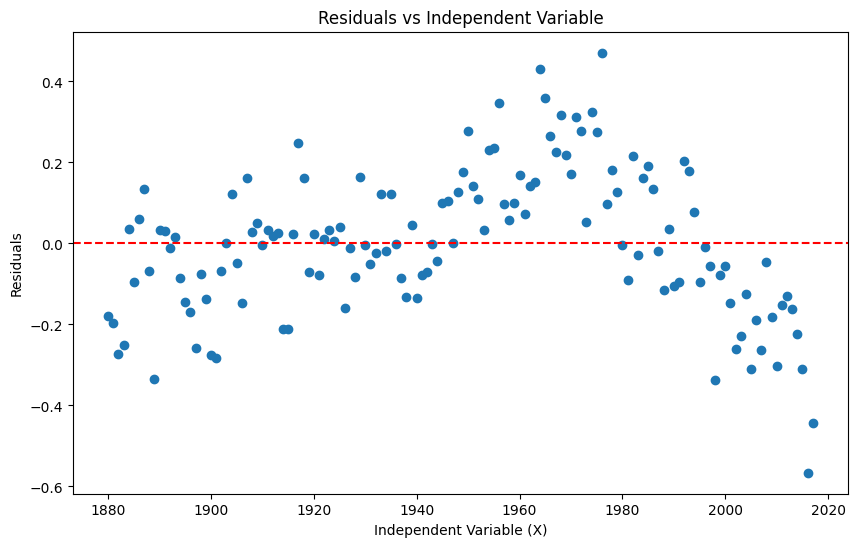

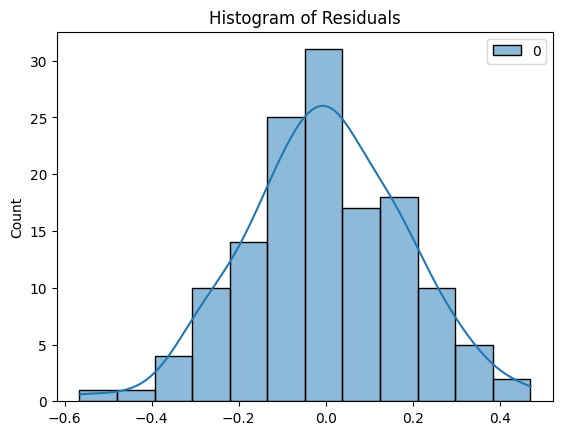

In [14]:
# 2C Plot the residuals
y_pred = model.predict(X)
residuals = y_pred - y
plt.figure(figsize=(10, 6))
plt.scatter(X, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Residuals')
plt.title('Residuals vs Independent Variable')
plt.show()

# bin = np.arrange(-1, 1, 0, 0.1)
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.show()
